**Importing the essential Libraries and Modules**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
from keras.models import Model
from keras.layers import Input, InputLayer
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import h5py

Using TensorFlow backend.


## **DATA PREPROCESSING**
1. ISOLATING THE LABELS FOR EACH IMAGE( also I will do One-hot encoding for the labels)
2. RESHAPING THE INPUT INTO A KERAS ACCEPTABLE FORMAT ( I will transform the input data to an array,which is the acceptable format for the keras platform)
3. SCALING ( we will scale down all the pixel values through dividing it by 255 so that every value lies between 0-1).

In [2]:
df_train= pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")
x_train = df_train.iloc[:,1:]
x_test= df_test.iloc[:,:]
y_train = df_train.iloc[:,0]

x_train = x_train.values
x_test = x_test.values
x_train = x_train.astype('float32'); x_test = x_test.astype('float32')
x_train /= 255; x_test /= 255
x_train = x_train.reshape(42000,28,28,1)
x_test = x_test.reshape(28000,28,28,1)
y_train= keras.utils.to_categorical(y_train,num_classes=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)
(42000, 10)


#**Model Building**#
we will build the model in the following sequence:
1. Convulation layer 1
2. Pooling layer 1
3. Convulation layer 2
4. Pooling layer 2
5. Flattening layer (input layer for the Neural network model)
6. Hidden layer 
7. Output layer

1.**Convolution layer 1**


*   No of filters(n1) = 16
* Filter dimension = 5*5
*   Activation function = Relu
*   Pass the dimensions of input as input shape (only for the first layer)








In [3]:
cnn_pilot = Sequential()
cnn_pilot.add(Conv2D(filters=16,
                     kernel_size=5,
                     activation = 'relu',
                     input_shape=(28,28,1)))

**2. Pooling layer 1**

the pooling layer takes patches of size [2x2] into consideration and has a stride of size = 2 as default .

In [4]:
#adding the first pooling layer
cnn_pilot.add(MaxPooling2D(pool_size=(2,2)))

2.**Convolution layer 2**


*   No of filters(n1) = 32
* Filter dimension = 5*5
*   Activation function = Relu

In [5]:
cnn_pilot.add(Conv2D(filters=32,
                     kernel_size=5,
                     activation = 'relu'))

**2. Pooling layer 2**
the pooling layer takes patches of size [2x2] into consideration and has a stride of size = 2 as default

In [6]:
cnn_pilot.add(MaxPooling2D(pool_size=(2,2)))

**Flattening Layer**

In [7]:
cnn_pilot.add(Flatten())

In [8]:
#adding the hidden layer
cnn_pilot.add(Dense(units= 64,
                    activation='relu'))
cnn_pilot.add(Dense(units = 10,
                    activation = 'softmax'))


In [9]:
cnn_pilot.compile(loss = "categorical_crossentropy",
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [10]:
cnn_pilot.summary()
Wsave = cnn_pilot.get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
print(Wsave)

[array([[[[-0.06416711,  0.05207314,  0.11010228, -0.00949272,
          -0.02074943, -0.06700563,  0.07912543,  0.05046853,
           0.02420054,  0.01915203,  0.05273208,  0.1021015 ,
           0.11400928, -0.02093114, -0.00543437,  0.0763656 ]],

        [[ 0.06166716,  0.0567635 ,  0.1026887 ,  0.01211473,
           0.06318484, -0.11428211, -0.05537031, -0.07737118,
           0.06237838,  0.01936062,  0.02048734, -0.04339158,
          -0.05344214, -0.01557107, -0.07178446,  0.03424898]],

        [[ 0.06087142,  0.04637654,  0.10098636,  0.01473533,
           0.04097296, -0.07204791, -0.02111448,  0.10769242,
           0.02040684, -0.07336122,  0.10648085, -0.01441066,
          -0.08988786,  0.08146599, -0.11022665,  0.06671207]],

        [[ 0.02479973,  0.0217749 ,  0.00745218,  0.07428806,
          -0.07945833, -0.08650769,  0.05721533, -0.0086915 ,
          -0.05201796, -0.0653239 ,  0.10635617, -0.09069493,
           0.07783128,  0.06430689, -0.04602762,  0.10365778

In [11]:
history = cnn_pilot.fit(x_train,
              y_train,
              batch_size = 100,
              epochs = 100,
              validation_split = 0.2 )

Epoch 1/100
336/336 [==============================] - 19s 57ms/step - loss: 0.3568 - accuracy: 0.8996 - val_loss: 0.1097 - val_accuracy: 0.9671
Epoch 2/100
336/336 [==============================] - 19s 56ms/step - loss: 0.0912 - accuracy: 0.9727 - val_loss: 0.0687 - val_accuracy: 0.9789
Epoch 3/100
336/336 [==============================] - 19s 56ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0571 - val_accuracy: 0.9831
Epoch 4/100
336/336 [==============================] - 19s 55ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0552 - val_accuracy: 0.9827
Epoch 5/100
336/336 [==============================] - 19s 55ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0454 - val_accuracy: 0.9856
Epoch 6/100
336/336 [==============================] - 19s 55ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0473 - val_accuracy: 0.9862
Epoch 7/100
336/336 [==============================] - 18s 55ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 0.0449 - val_ac

In [12]:
print(Wsave)

[array([[[[-0.10447084,  0.00344224, -0.04961568, -0.08079778,
          -0.08522232, -0.09059306, -0.01399678,  0.06618771,
          -0.07212882,  0.11225842, -0.01244699, -0.00846564,
           0.04842553, -0.02894395,  0.09183466,  0.04766479]],

        [[ 0.04027484,  0.00753333, -0.00863174,  0.05638185,
           0.08434723,  0.00712293,  0.04317278,  0.01681103,
           0.03163277, -0.02166136,  0.03485429,  0.03638119,
          -0.11175496, -0.05750646,  0.05058073, -0.02433427]],

        [[ 0.01898254,  0.11637288,  0.02943704, -0.1041822 ,
          -0.01468332,  0.10319372, -0.01915611, -0.07876946,
          -0.06096289,  0.09426171,  0.06203429, -0.09216905,
           0.06383377, -0.09368788, -0.04512567, -0.09528554]],

        [[-0.01079888, -0.09868007, -0.0742107 , -0.0965438 ,
           0.11073129,  0.04421222,  0.10664311, -0.05924208,
          -0.03603428,  0.06928946,  0.07797322,  0.01486368,
           0.0009094 , -0.05310044,  0.10495052,  0.10426931

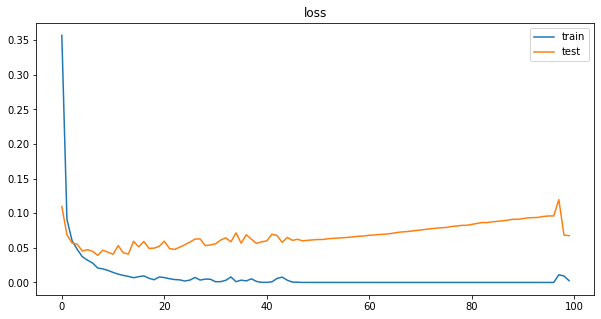

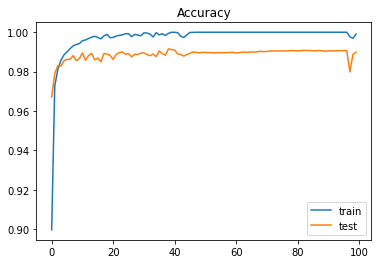

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"],label= "train")
plt.plot(history.history["val_loss"], label= "test")
plt.title('loss')
plt.legend()
plt.show()
plt.plot(history.history["accuracy"], label ="train")
plt.plot(history.history["val_accuracy"], label ="test")
plt.title('Accuracy')
plt.legend()
plt.show()

We see that after a certain no.of epochs the validation loss increases and from there on osciliates non-unformly . this means that beyond a certain epoch our model begins to overfit ! . One of the methods of controlling overfitting is by using   'early stopping' .

  **Early Stopping**  : while the model trains , beyond a certain epoch the loss and accuracy tends to fluctuate. we try to 'catch' the model when it is at its best by saving the model when it has it's lowest loss or highest accuracy , some allowance is given to ensure that the we have the best model , that is called 'patience'. patience is the no of epochs that is allowed to train , to check if the accuracy/loss gets better or not .


In [14]:
cnn_pilot.set_weights(Wsave)
es = EarlyStopping(monitor= 'val_loss', patience= 4, mode= 'min', verbose= 1)
mc= ModelCheckpoint('Best_Cnn', monitor= 'val_loss', save_best_only= True,mode= 'min', verbose= 1)

history = cnn_pilot.fit(x_train,
                        y_train,
                        batch_size = 100,
                        epochs = 100,
                        validation_split = 0.2,
                        verbose = 1,
                        callbacks = [es,mc])

Epoch 1/100
336/336 [==============================] - ETA: 0s - loss: 0.2670 - accuracy: 0.9142
Epoch 00001: val_loss improved from inf to 0.08574, saving model to Best_Cnn
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Best_Cnn/assets
336/336 [==============================] - 19s 57ms/step - loss: 0.2670 - accuracy: 0.9142 - val_loss: 0.0857 - val_accuracy: 0.9731
Epoch 2/100
336/336 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9783
Epoch 00002: val_loss improved from 0.08574 to 0.06133, saving model to Best_Cnn
INFO:tensorflow:Assets written to: Best_Cnn/assets
336/336 [==============================] - 21s 63ms/step - loss: 0.0686 - accuracy: 0.9783 - val_loss: 0.0613 - val_accuracy: 0.9813
Epoch 3/100
336/336 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9856
Epoch 00003: val_loss improved from 0.06133 to 0.05439, saving model to Best_Cnn
INFO:tensorflow:Asset

Train: [0.01908090151846409, 0.9940952658653259]


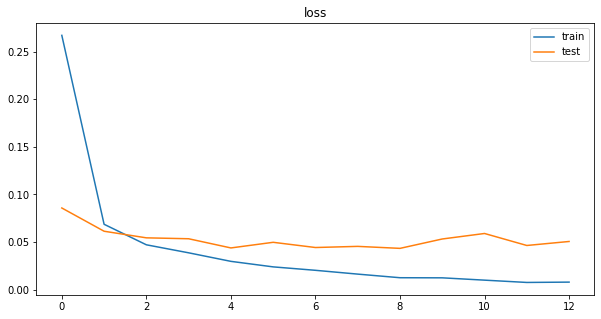

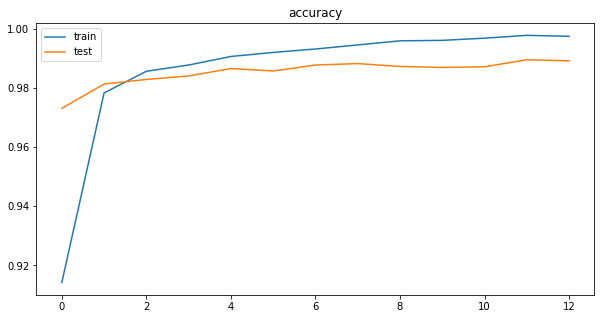

In [15]:
cnn_best = load_model("Best_Cnn")
train_acc = cnn_best.evaluate(x_train, y_train, verbose=0)
print("Train: {}".format(train_acc))
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('accuracy')
plt.legend()
plt.show()

In [16]:
results = cnn_pilot.predict(x_test)
results = np.argmax(results,axis = 1)
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),"Label": results})
submissions.to_csv("submission.csv", index=False, header=True)